In [ ]:
from google.colab import files

uploaded = files.upload()


In [ ]:
import pandas as pd

df = pd.read_csv('comments14k.csv',encoding='latin-1')
print(df.head())

                                                text  classification
0                           These people are freaks!               1
1                            Ben Shapiro is correct.               0
2  I wish I was Ben for that moment. The coroner ...               1
3  If you're the smartest one in the room, you're...               0
4  He'd never say that to someone that is a physi...               1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14736 entries, 0 to 14735
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            14736 non-null  object
 1   classification  14736 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 230.4+ KB


In [ ]:
df2 = pd.DataFrame(data={'comments': df['text'], 'new_comments': df['text']})
df2.head()

,comments,new_comments
0,These people are freaks!,These people are freaks!
1,Ben Shapiro is correct.,Ben Shapiro is correct.
2,I wish I was Ben for that moment. The coroner ...,I wish I was Ben for that moment. The coroner ...
3,"If you're the smartest one in the room, you're...","If you're the smartest one in the room, you're..."
4,He'd never say that to someone that is a physi...,He'd never say that to someone that is a physi...


The first pre-processing step we will do is transform all comments into lower case and create a new column new_commemts.

In [ ]:
df['new_comments'] = df['text'].astype(str).apply(lambda x: " ".join(x.lower() for x in x.split()))
df2['new_comments']=df['new_comments']
df2.head()

,comments,new_comments
0,These people are freaks!,these people are freaks!
1,Ben Shapiro is correct.,ben shapiro is correct.
2,I wish I was Ben for that moment. The coroner ...,i wish i was ben for that moment. the coroner ...
3,"If you're the smartest one in the room, you're...","if you're the smartest one in the room, you're..."
4,He'd never say that to someone that is a physi...,he'd never say that to someone that is a physi...


lets remove contractions.from index 4 comment we have a contraction. ex:it's is it is and he'd is he would

In [ ]:
!pip install contractions

In [ ]:
import contractions
df['new_comments']=df['new_comments'].apply(lambda x:contractions.fix(x))
df2['new_comments']=df['new_comments']
df2.head()

,comments,new_comments
0,These people are freaks!,these people are freaks!
1,Ben Shapiro is correct.,ben shapiro is correct.
2,I wish I was Ben for that moment. The coroner ...,i wish i was ben for that moment. the coroner ...
3,"If you're the smartest one in the room, you're...","if you are the smartest one in the room, you a..."
4,He'd never say that to someone that is a physi...,he would never say that to someone that is a p...


Lets remove punctuation marks

In [ ]:
df['new_comments'] = df['new_comments'].str.replace(r'[^\w\s]', '', regex=True)
df2['new_comments']=df['new_comments']
df2.head()

,comments,new_comments
0,These people are freaks!,these people are freaks
1,Ben Shapiro is correct.,ben shapiro is correct
2,I wish I was Ben for that moment. The coroner ...,i wish i was ben for that moment the coroner w...
3,"If you're the smartest one in the room, you're...",if you are the smartest one in the room you ar...
4,He'd never say that to someone that is a physi...,he would never say that to someone that is a p...


From above output line 7 has the comment as "He is disgusting with a disgusting ideology. ðŸ¤®".So there are still some characters left so lets encode them and find out what they are and clean the data.

In [ ]:
# Replace unencodable characters with a placeholder
df['new_comments'] = df['new_comments'].apply(lambda x: x.encode('latin1', errors='replace').decode('utf-8', errors='replace'))
df2['new_comments'] = df['new_comments']
df2.head(10)

,comments,new_comments
0,These people are freaks!,these people are freaks
1,Ben Shapiro is correct.,ben shapiro is correct
2,I wish I was Ben for that moment. The coroner ...,i wish i was ben for that moment the coroner w...
3,"If you're the smartest one in the room, you're...",if you are the smartest one in the room you ar...
4,He'd never say that to someone that is a physi...,he would never say that to someone that is a p...
5,Everyone in the room flunked biology except Ben.,everyone in the room flunked biology except ben
6,Why would he go home in an ambulance?,why would he go home in an ambulance
7,He is disgusting with a disgusting ideology. ????,he is disgusting with a disgusting ideology
8,"looks like a man, sounds like a man, physicall...",looks like a man sounds like a man physically ...
9,So ambulance is going to take him home??! That...,so ambulance is going to take him home that th...


As it is replacing the unwanted character with  '�' this one we will further replace this with an empty string using replace function

In [ ]:
df['new_comments'] = df['new_comments'].apply(lambda x: x.encode('latin1', errors='replace').decode('utf-8', errors='replace').replace('�', '') )
df2['new_comments'] = df['new_comments']
df2.head()

,comments,new_comments
0,These people are freaks!,these people are freaks
1,Ben Shapiro is correct.,ben shapiro is correct
2,I wish I was Ben for that moment. The coroner ...,i wish i was ben for that moment the coroner w...
3,"If you're the smartest one in the room, you're...",if you are the smartest one in the room you ar...
4,He'd never say that to someone that is a physi...,he would never say that to someone that is a p...


As this is not working lets use regex to remove this

In [ ]:
df['new_comments'] = df['new_comments'].str.replace(r'[^\w\s]', '', regex=True)
df2['new_comments']=df['new_comments']
df2.head()

,comments,new_comments
0,These people are freaks!,these people are freaks
1,Ben Shapiro is correct.,ben shapiro is correct
2,I wish I was Ben for that moment. The coroner ...,i wish i was ben for that moment the coroner w...
3,"If you're the smartest one in the room, you're...",if you are the smartest one in the room you ar...
4,He'd never say that to someone that is a physi...,he would never say that to someone that is a p...


Successfully we removed all the special characters and unwanted characters but there are still some numbers lets remove them too

In [ ]:
df['new_comments']=df['new_comments'].apply(lambda x:''.join([i for i in x if not i.isdigit()]))
df2['new_comments']=df['new_comments']
df2.head()

,comments,new_comments
0,These people are freaks!,these people are freaks
1,Ben Shapiro is correct.,ben shapiro is correct
2,I wish I was Ben for that moment. The coroner ...,i wish i was ben for that moment the coroner w...
3,"If you're the smartest one in the room, you're...",if you are the smartest one in the room you ar...
4,He'd never say that to someone that is a physi...,he would never say that to someone that is a p...


In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['new_comments']=df['new_comments'].apply(lambda x:' '.join(x for x in x.split() if x not in stop_words))
df2['new_comments']=df['new_comments']
df2.head()


,comments,new_comments
0,These people are freaks!,people freaks
1,Ben Shapiro is correct.,ben shapiro correct
2,I wish I was Ben for that moment. The coroner ...,wish ben moment coroner would pulling dudes nu...
3,"If you're the smartest one in the room, you're...",smartest one room wrong room
4,He'd never say that to someone that is a physi...,would never say someone physical threat cowardly


lemmatization

In [ ]:
import spacy
from langdetect import detect,LangDetectException
# Load the English language model
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemm(comment):
  c = nlp(comment)
  return ' '.join(token.lemma_ for token in c)

In [ ]:
df['new_comments']=df['new_comments'].apply(lambda x: lemm(x))
df['new_comments']=df['new_comments'].fillna('')
df2['new_comments']=df['new_comments']
df2.head()

,comments,new_comments
0,These people are freaks!,people freak
1,Ben Shapiro is correct.,ben shapiro correct
2,I wish I was Ben for that moment. The coroner ...,wish ben moment coroner would pull dude nut he...
3,"If you're the smartest one in the room, you're...",smart one room wrong room
4,He'd never say that to someone that is a physi...,would never say someone physical threat cowardly


In [ ]:
data={'pre_comments':df['new_comments'],'classification':df['classification']}
df4=pd.DataFrame(data)
df4.head()

,pre_comments,classification
0,people freak,1
1,ben shapiro correct,0
2,wish ben moment coroner would pull dude nut he...,1
3,smart one room wrong room,0
4,would never say someone physical threat cowardly,1


In [ ]:
df4.to_csv('preproccessed_comments.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
# df = df.dropna(subset=['classification'])
x=df['new_comments']
y=df['classification']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
x.shape,y.shape

((14736,), (14736,))

63 percent cyberbyllying
37 percent non cyberbullying

In [ ]:
print(y_train.value_counts())

classification
1    6239
0    3634
Name: count, dtype: int64


In [ ]:
y_test.value_counts()

,count
classification,
1,3069
0,1794


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer


# Create a TfidfVectorizer to convert text to numerical features
vectorizer = TfidfVectorizer()

# Fit the vectorizer to your training data and transform it
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)


In [ ]:
import pickle

In [ ]:
with open('vectorizer.pkl','wb') as file:
  pickle.dump(vectorizer,file)

In [ ]:
X_train_vec.shape,X_test_vec.shape

((9873, 22206), (4863, 22206))

In [ ]:
# Now use the transformed data for training
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)

LogisticRegression()

In [ ]:
import pickle
with open('lr.pkl','wb') as file:
  pickle.dump(lr,file)

In [ ]:
#now lets predict for test data
y_pred=lr.predict(X_test_vec)
pred_df=pd.DataFrame(data={'tested_comments':X_test,'y_predicted':y_pred,'y_actual':y_test})
pred_df.head()

,tested_comments,y_predicted,y_actual
6862,reza_rahman quran hadith full hatred murder mu...,1,1
13433,personal attack ey mind race think shall big m...,1,1
14303,possibly justifie redirect element exist ficti...,0,0
13557,revert vadalism user page,0,1
6975,fulaan_hazm imprison people mosul allow leave ...,1,1


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_actul_arr=np.array(y_test)
y_pred_arr=np.array(y_pred)
cm=confusion_matrix(y_actul_arr,y_pred_arr)

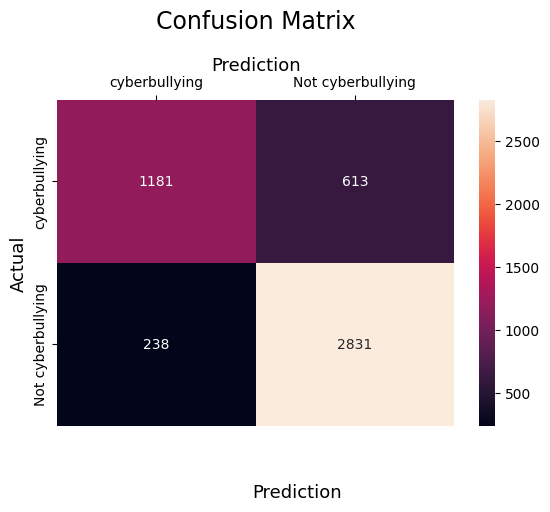

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [ ]:
print(classification_report(y_actul_arr, y_pred_arr))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74      1794
           1       0.82      0.92      0.87      3069

    accuracy                           0.83      4863
   macro avg       0.83      0.79      0.80      4863
weighted avg       0.83      0.83      0.82      4863



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8250051408595517

RANDOMFOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_vec,y_train)

RandomForestClassifier()

In [ ]:
y_rfc_pred=rfc.predict(X_test_vec)
y_rfc_pred_arr=np.array(y_rfc_pred)
cm=confusion_matrix(y_actul_arr,y_rfc_pred_arr)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['cyberbullying','Not cyberbullying'],
            yticklabels=['cyberbullying','Not cyberbullying'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()


In [ ]:
accuracy_score(y_test, y_rfc_pred)